In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.drop(columns="id",inplace=True)

In [5]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [6]:
df.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     3566 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df = df.fillna(df['bmi'].mean())
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace = True)

In [10]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
catFeatures = ['gender', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 'smoking_status']
for catFeature in catFeatures:
    print(df[catFeature].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 28.893236911794673]


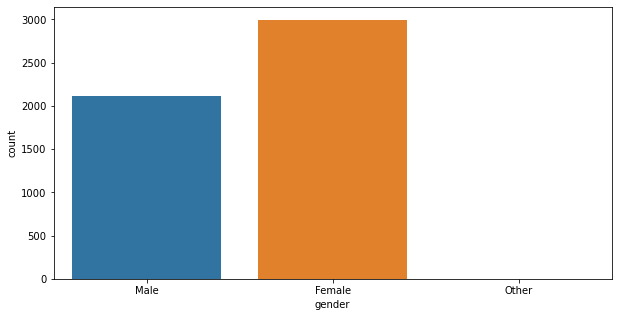

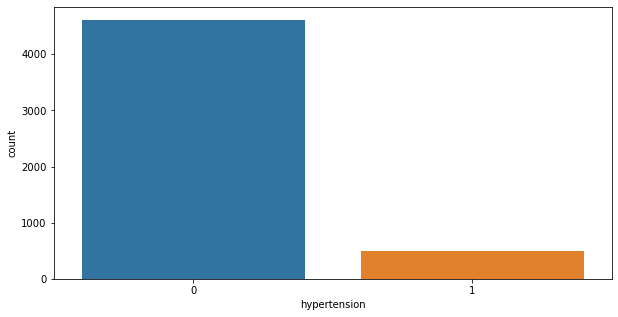

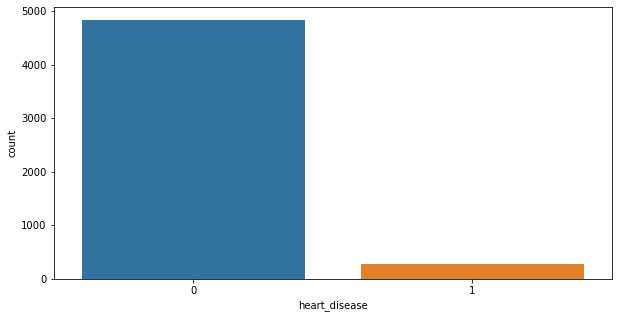

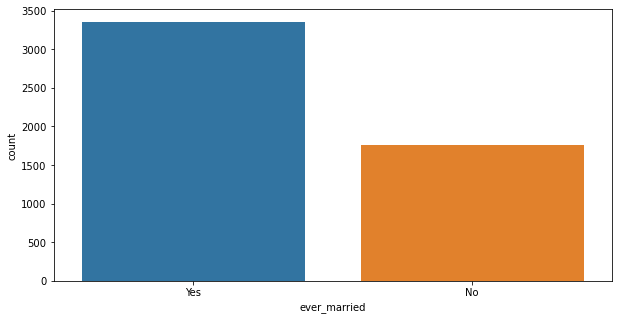

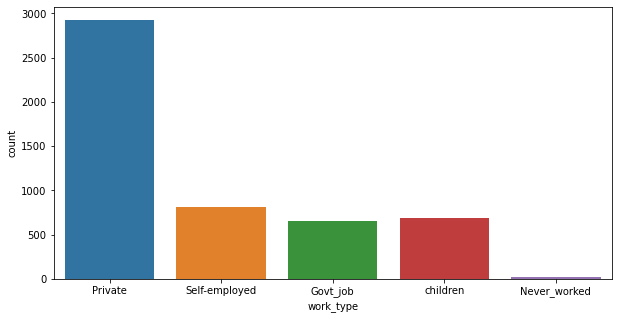

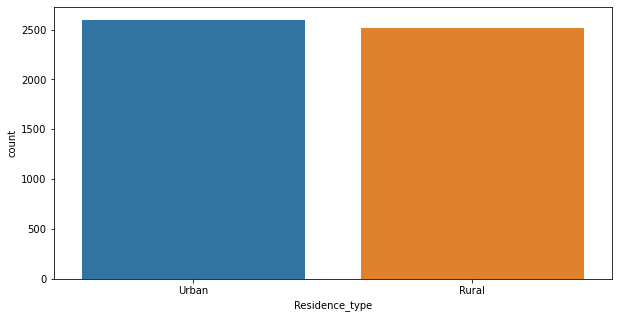

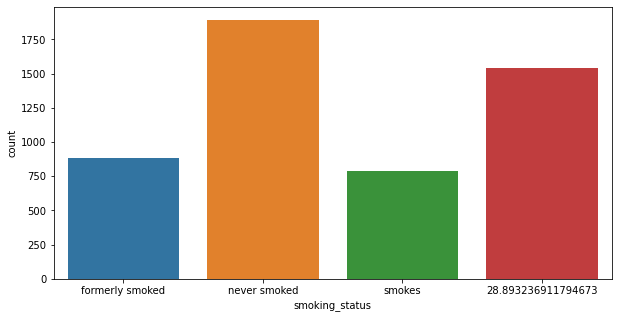

In [12]:
for catFeature in catFeatures:
    plt.figure(figsize=(10,5))
    sns.countplot(x = df[catFeature])
    plt.show()

In [13]:
from pandas_profiling import ProfileReport

In [14]:
profile = ProfileReport(df, title="Pandas Profiling Report",explorative=True)


In [15]:
profile

In [16]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


In [17]:
AV = AutoViz_Class()

Shape of your Data Set: (5110, 12)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


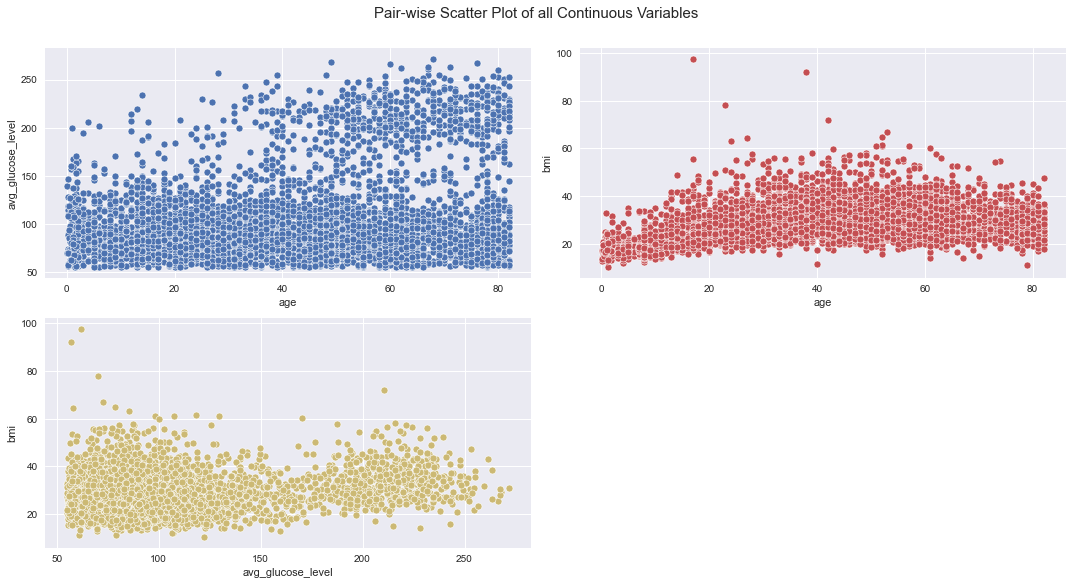

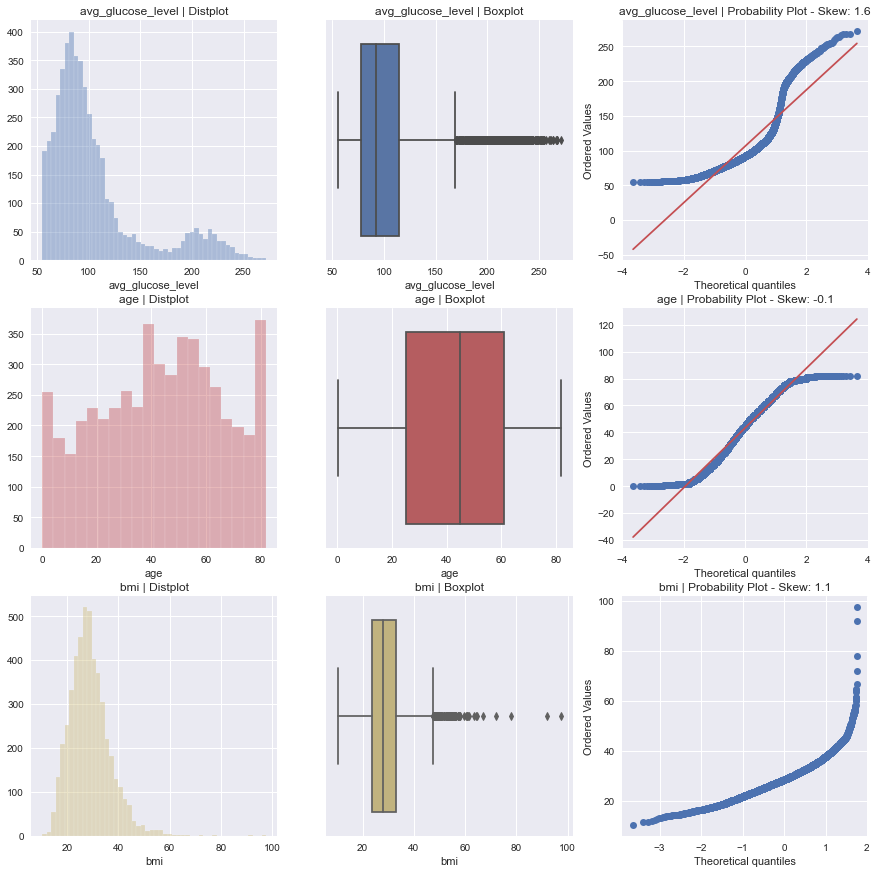

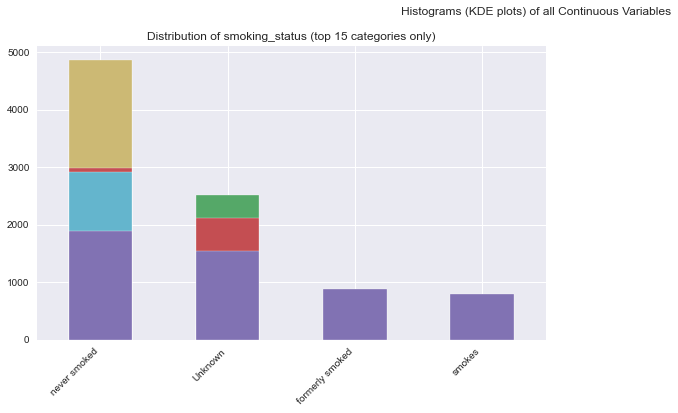

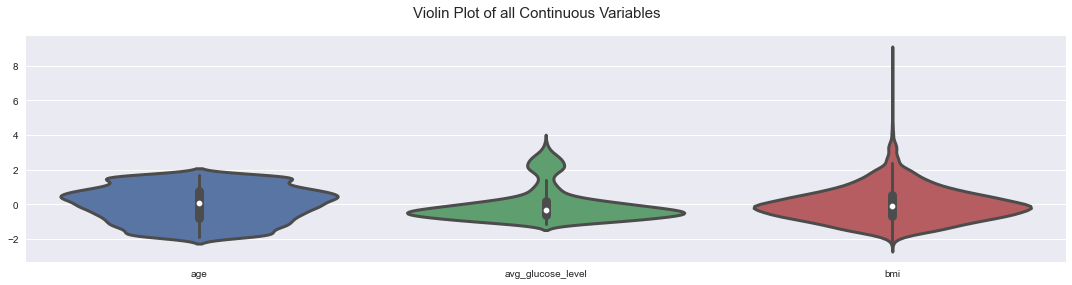

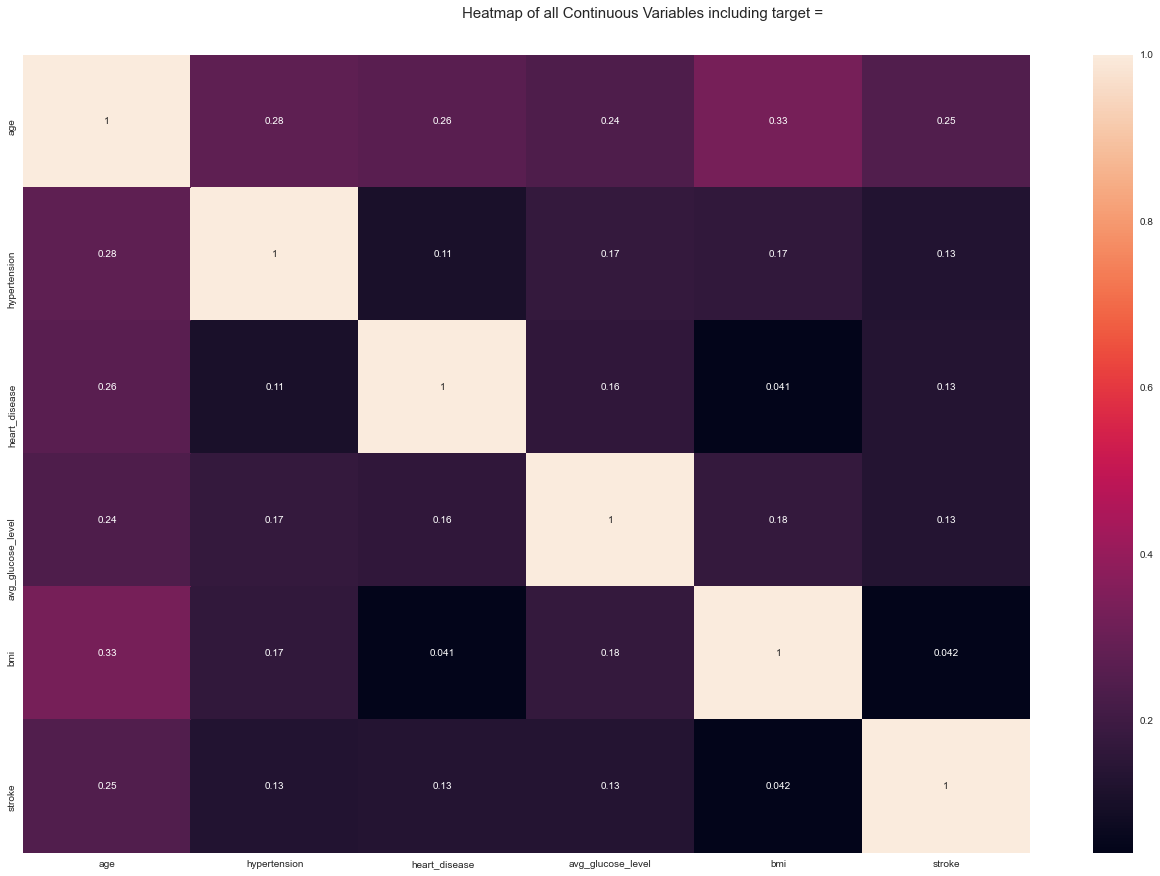

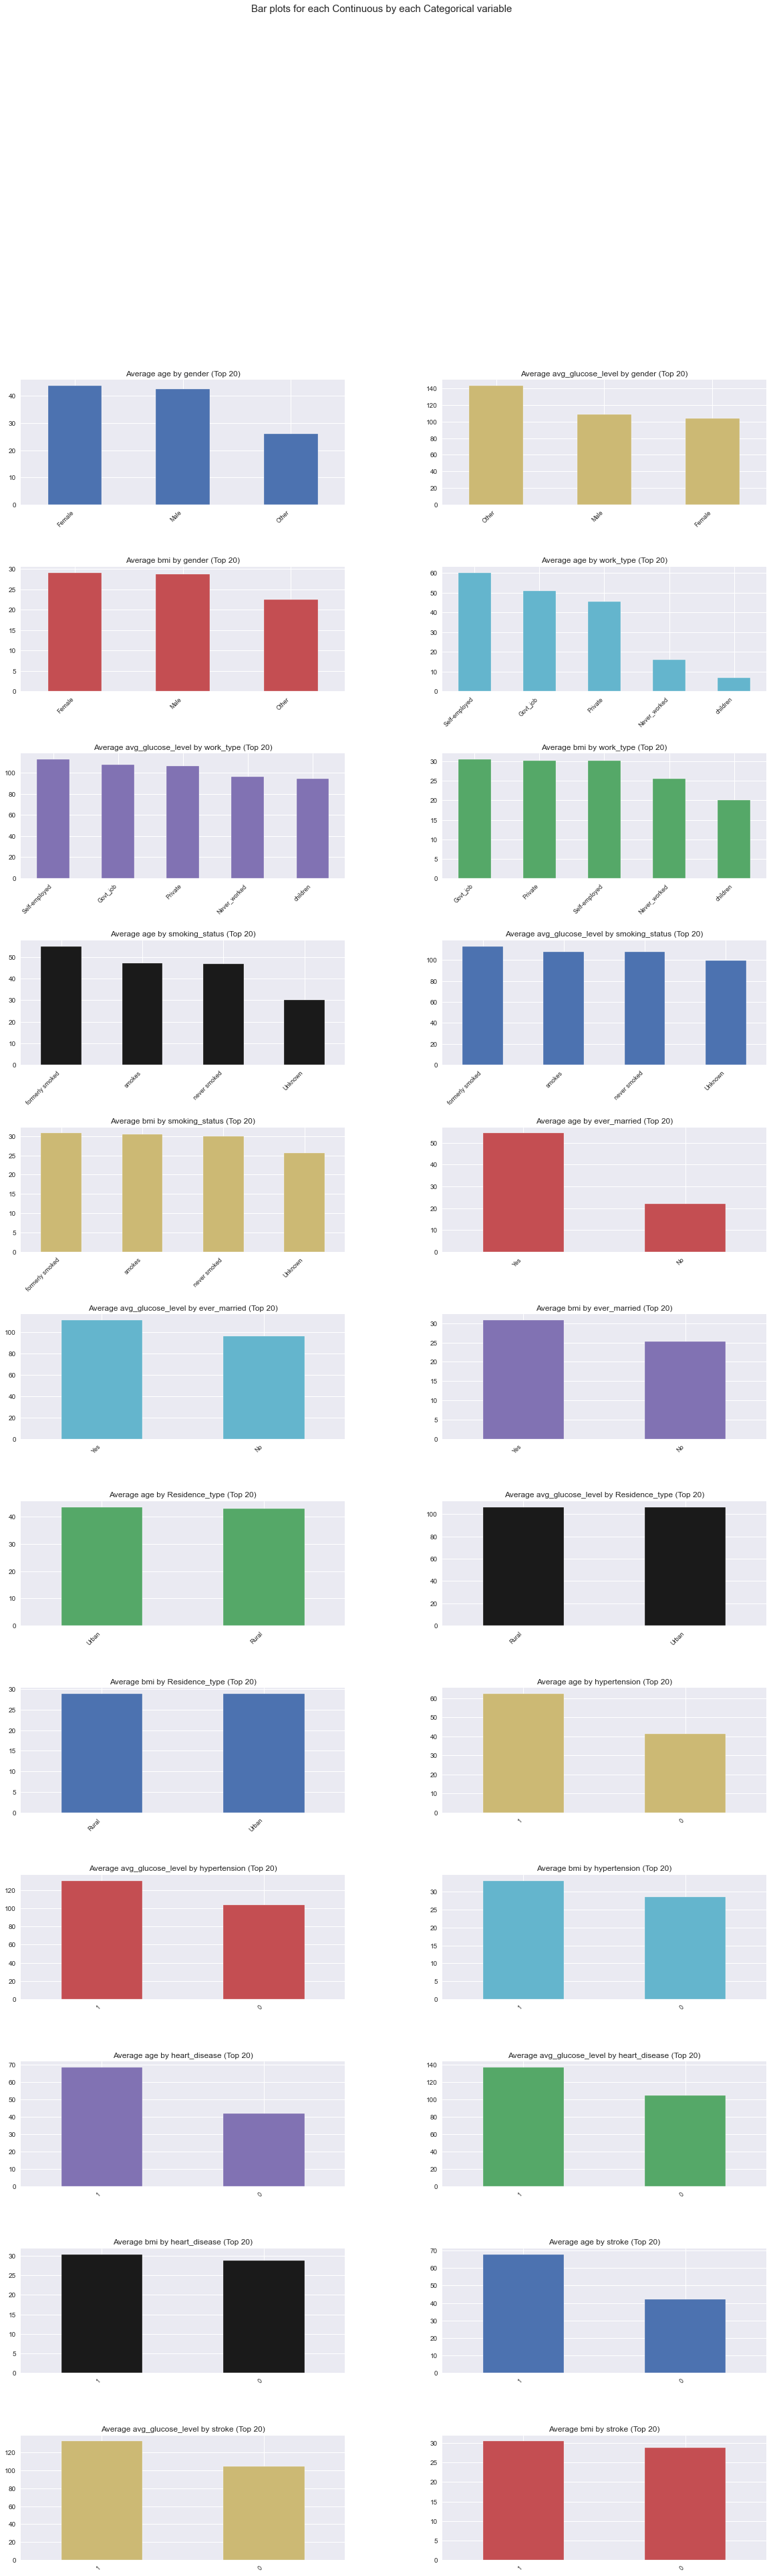

Time to run AutoViz (in seconds) = 19.993

 ###################### VISUALIZATION Completed ########################


In [18]:
dff = AV.AutoViz('healthcare-dataset-stroke-data.csv')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

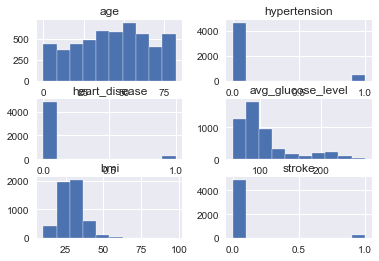

In [19]:
df.hist()

In [20]:
a=pd.get_dummies(df.gender)
b=pd.get_dummies(df.ever_married)
c=pd.get_dummies(df.work_type)
d=pd.get_dummies(df.Residence_type)
e=pd.get_dummies(df.smoking_status)

In [21]:
merged=pd.concat([df, a, b, c, d, e,], axis='columns')
merged.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,Never_worked,Private,Self-employed,children,Rural,Urban,28.893236911794673,formerly smoked,never smoked,smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,...,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,...,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,...,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,...,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,...,0,0,1,0,1,0,0,0,1,0


In [22]:
dataset = pd.get_dummies(df, columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [23]:
dataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_28.893236911794673,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [24]:
data=merged.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'Male', 'Yes', 'Private', 'Urban', 'formerly smoked'], axis='columns')
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Other,No,Govt_job,Never_worked,Self-employed,children,Rural,28.893236911794673,never smoked,smokes
0,67.0,0,1,228.69,36.600000,1,0,0,0,0,0,0,0,0,0,0,0
1,61.0,0,0,202.21,28.893237,1,1,0,0,0,0,1,0,1,0,1,0
2,80.0,0,1,105.92,32.500000,1,0,0,0,0,0,0,0,1,0,1,0
3,49.0,0,0,171.23,34.400000,1,1,0,0,0,0,0,0,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,1,0,0,0,0,1,0,1,0,1,0


In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
dff=data.apply(le.fit_transform)

In [27]:
x=dff.drop('stroke', axis='columns')
y=dff.stroke

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
from sklearn import tree
model1=tree.DecisionTreeClassifier()
model1.fit(x_train, y_train)
model1.score(x_test, y_test)


0.9207436399217221

In [31]:
model1.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_test)


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Training Score of RandomForestClassifier is: {:.3f}%".format(model_rf.score(x_train, y_train)*100))
print("The Confusion Matrix for RandomForestClassifier is: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print("The Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
print("The Accuracy Score of RandomForestClassifier is: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

The Training Score of RandomForestClassifier is: 99.976%
The Confusion Matrix for RandomForestClassifier is: 
[[978   0]
 [ 43   1]]

The Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       978
           1       1.00      0.02      0.04        44

    accuracy                           0.96      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.96      0.96      0.94      1022


The Accuracy Score of RandomForestClassifier is: 95.793%


In [34]:
from sklearn.model_selection import RandomizedSearchCV


In [35]:
Rand_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [36]:
Rand_search = RandomizedSearchCV(estimator=model_rf,param_distributions=Rand_param,cv=5,n_jobs =-1,verbose = 3)

In [37]:
Rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.4s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [90, 100, 115, 130]},
                   verbose=3)

In [38]:
Rand_search.best_params_

{'n_estimators': 90,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 19,
 'criterion': 'gini'}

In [39]:
model_rf= RandomForestClassifier(n_estimators=90,
 min_samples_split=7,
 min_samples_leaf=9,
 max_features= 'auto',
 max_depth= 12,
 criterion= 'entropy')

In [40]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=9,
                       min_samples_split=7, n_estimators=90)

In [41]:
model_rf.score(x_train, y_train)


0.949853228962818

In [42]:
y_pred=model_rf.predict(x_test)

In [43]:
acc=accuracy_score(y_pred,y_test)

In [44]:
acc

0.9569471624266145

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

Y_pred=knn.predict(x_test)
ac_knn=accuracy_score(y_test,y_pred)
ac_knn

0.9569471624266145

In [46]:
Rand_param =  { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [47]:
Rand_search = RandomizedSearchCV(estimator=knn,param_distributions=Rand_param,n_jobs =-1,verbose = 3)

In [48]:
Rand_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.6s finished


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32,
                                                      34],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]},
                   verbose=3)

In [49]:
Rand_search.best_params_

{'n_neighbors': 13, 'leaf_size': 30, 'algorithm': 'ball_tree'}

In [50]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =11)

In [51]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=11)

In [52]:
knn.score(x_train,y_train)

0.9500978473581213

In [53]:
knn.score(x_test,y_test)

0.9569471624266145

In [54]:
y_score1 = model_rf.predict_proba(x_test)[:,1]
y_score2 = knn.predict_proba(x_test)[:,1]

In [55]:
from sklearn.metrics import roc_curve

In [56]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)

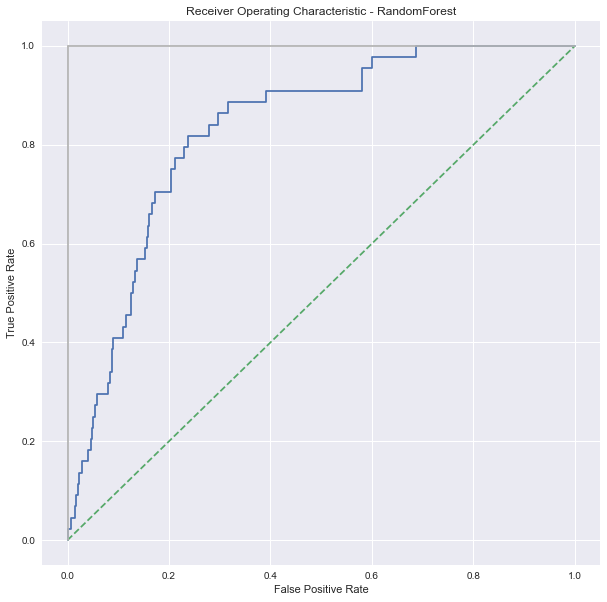

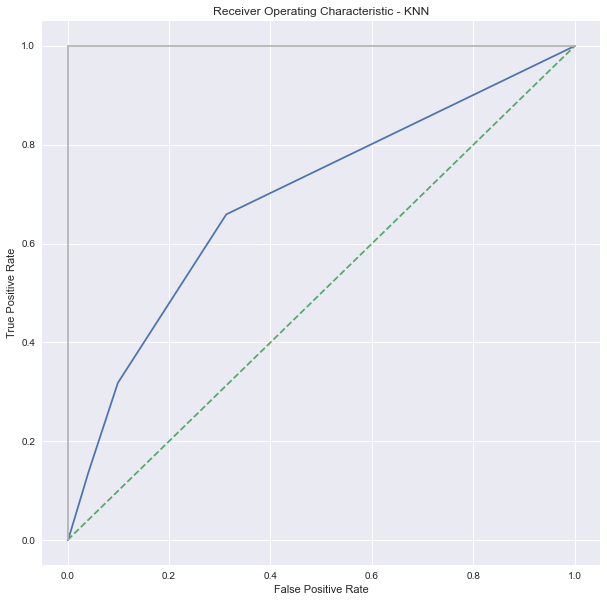

In [57]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RandomForest')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - KNN')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
print('roc_auc_score for Random forest: ', roc_auc_score(y_test, y_score1))
print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score2))

roc_auc_score for Random forest:  0.829754601226994
roc_auc_score for KNN:  0.6903815765012085


In [60]:
import pickle

In [61]:
filename="Stroke prediction"
pickle.dump(model_rf,open(filename,"wb"))